#MODELLING AND ANALYSIS FOR PROJECT OF CSSM 502 - MUSTAFA ÖZER

##Importing the Dataset and Libraries

In [45]:
import pandas as pd
# Load the dataset
data = pd.read_excel('conflict_final.xlsx')

In [46]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
conflict_final = data

## DESCRIPTIVE STATISTICS

In [48]:
# Descriptive Statistics - tab1
tab1 = conflict_final.groupby('active').agg(
    mean_growth=('GDPpercap_growth', lambda x: np.mean(x.dropna())),
    mean_bureau=('bureacratic_quality', lambda x: np.mean(x.dropna())),
    mean_govtstability=('govt_stability', lambda x: np.mean(x.dropna())),
    mean_intconflict=('internal_conflict', lambda x: np.mean(x.dropna())),
    mean_democraticaccount=('democratic_accountability', lambda x: np.mean(x.dropna())),
    mean_corruption=('corruption', lambda x: np.mean(x.dropna()))
)
tab1

,mean_growth,mean_bureau,mean_govtstability,mean_intconflict,mean_democraticaccount,mean_corruption
active,,,,,,
0,2.623143,0.969418,8.556757,8.331597,3.055956,1.947249
1,1.336304,1.202295,8.007397,6.494052,2.695199,1.695048


In [81]:
# Descriptive Statistics - tab2
tab2 = conflict_final[conflict_final['peace_by'].isin([2, 3])].groupby('peace_by').agg(
    mean_growth=('GDPpercap_growth', lambda x: np.mean(x.dropna())),
    mean_bureau=('bureacratic_quality', lambda x: np.mean(x.dropna())),
    mean_govtstability=('govt_stability', lambda x: np.mean(x.dropna())),
    mean_intconflict=('internal_conflict', lambda x: np.mean(x.dropna())),
    mean_democraticaccount=('democratic_accountability', lambda x: np.mean(x.dropna())),
    mean_corruption=('corruption', lambda x: np.mean(x.dropna()))
)
tab2

,mean_growth,mean_bureau,mean_govtstability,mean_intconflict,mean_democraticaccount,mean_corruption
peace_by,,,,,,
2,2.333984,0.618421,8.969846,8.219298,3.273026,2.065241
3,3.323010,1.271205,7.220982,7.818080,3.213542,1.837054


In [82]:
# Descriptive Statistics - tab3
tab3 = conflict_final[(conflict_final['peace_by'].isin([2, 3])) & (conflict_final['peace_fiveyrs'] == 1)].groupby('peace_by').agg(
    mean_growth=('GDPpercap_growth', lambda x: np.mean(x.dropna())),
    mean_bureau=('bureacratic_quality', lambda x: np.mean(x.dropna())),
    mean_govtstability=('govt_stability', lambda x: np.mean(x.dropna())),
    mean_intconflict=('internal_conflict', lambda x: np.mean(x.dropna())),
    mean_democraticaccount=('democratic_accountability', lambda x: np.mean(x.dropna())),
    mean_corruption=('corruption', lambda x: np.mean(x.dropna()))
)
tab3

,mean_growth,mean_bureau,mean_govtstability,mean_intconflict,mean_democraticaccount,mean_corruption
peace_by,,,,,,
2,2.725980,0.710526,9.384868,8.118421,2.669956,2.143640
3,4.335241,1.194010,7.682292,7.538411,2.903646,1.908203


In [83]:
# T-test
growth_active = conflict_final[conflict_final['active'] == 1]['bureacratic_quality'].dropna()
growth_notactive = conflict_final[conflict_final['active'] == 0]['bureacratic_quality'].dropna()
t_test_result = sm.stats.ttest_ind(growth_active, growth_notactive)


In [84]:
tab1, tab2, tab3, t_test_result

(        mean_growth  mean_bureau  mean_govtstability  mean_intconflict  \
 active                                                                   
 0          2.623143     0.969418            8.556757          8.331597   
 1          1.336304     1.202295            8.007397          6.494052   
 
         mean_democraticaccount  mean_corruption  
 active                                           
 0                     3.055956         1.947249  
 1                     2.695199         1.695048  ,
           mean_growth  mean_bureau  mean_govtstability  mean_intconflict  \
 peace_by                                                                   
 2            2.333984     0.618421            8.969846          8.219298   
 3            3.323010     1.271205            7.220982          7.818080   
 
           mean_democraticaccount  mean_corruption  
 peace_by                                           
 2                       3.273026         2.065241  
 3                      

#PANEL REGRESSIONS

In [53]:

# Here I convert the DataFrame to a multi-indexed DataFrame (panel data structure)
conflict_p = conflict_final.set_index(['country', 'year'])

# Display the DataFrame
print(conflict_p.head())

# Filter out rows where any of the specified columns have missing values
conflict_p1 = conflict_p.dropna(subset=['GDPpercap', 'GDPpercap_growth', 'GDP_growth', 'GDP'])



print(conflict_p.columns)
print(conflict_p.index.names)




              index  fatal  intensity  active  agreement  peace_by  \
country year                                                         
Algeria 1998      1   3032   1.004215       1          0         1   
        1999      2   1025   0.334711       1          0         1   
        2000      3    932   0.300236       1          0         1   
        2001      4    642   0.204124       1          0         1   
        2002      5    539   0.169204       1          0         1   

              time_to_event2  time_to_event3  peace_fiveyrs  agreement_type  \
country year                                                                  
Algeria 1998             NaN             NaN              0               0   
        1999             NaN             NaN              0               0   
        2000             NaN             NaN              0               0   
        2001             NaN             NaN              0               0   
        2002             NaN       

#Robustness check for the period before/after 2008

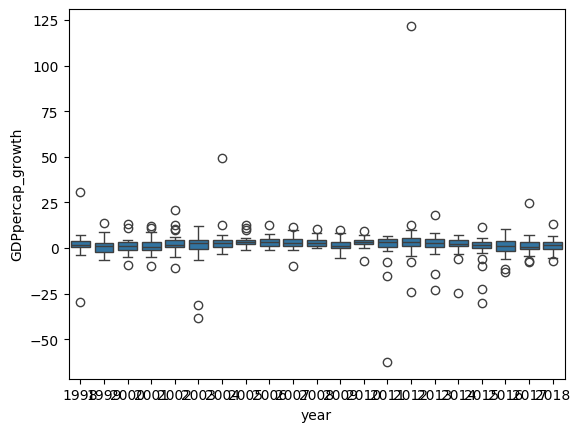

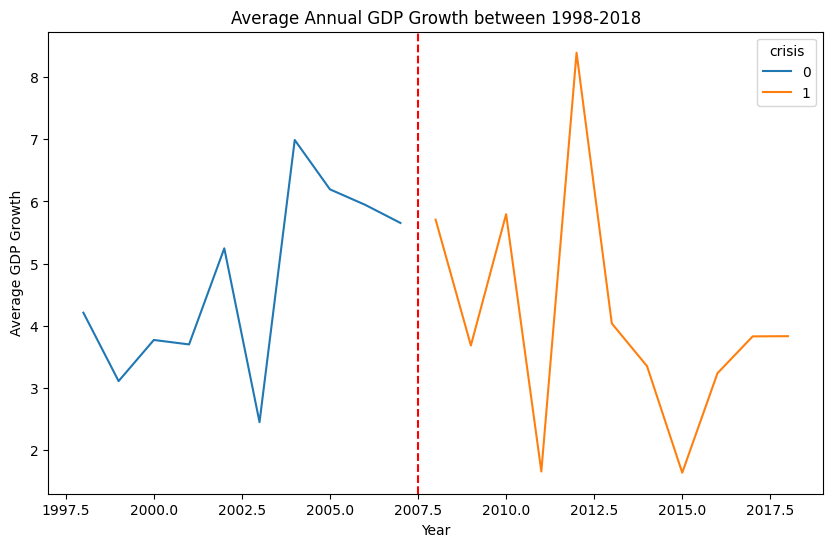

In [79]:
# Resetting the index if 'year' is not a column
if 'year' not in conflict_p1.columns:
    conflict_p1 = conflict_p1.reset_index()

# Now, lets continue with our analysis
# Preparing data for annual growth
yearly_growth = conflict_p1.groupby('year').GDP_growth.mean().reset_index()
yearly_growth.rename(columns={'GDP_growth': 'mean_growth'}, inplace=True)
yearly_growth['crisis'] = yearly_growth['year'].apply(lambda x: 0 if x < 2008 else 1)

# Boxplot
sns.boxplot(x='year', y='GDPpercap_growth', data=conflict_p1)
plt.show()

# Plot for yearly growth
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_growth, x='year', y='mean_growth', hue='crisis')
plt.axvline(x=2007.5, linestyle='--', color='red')  # Crisis line
plt.title('Average Annual GDP Growth between 1998-2018')
plt.xlabel('Year')
plt.ylabel('Average GDP Growth')
plt.show()




# Correlation matrix

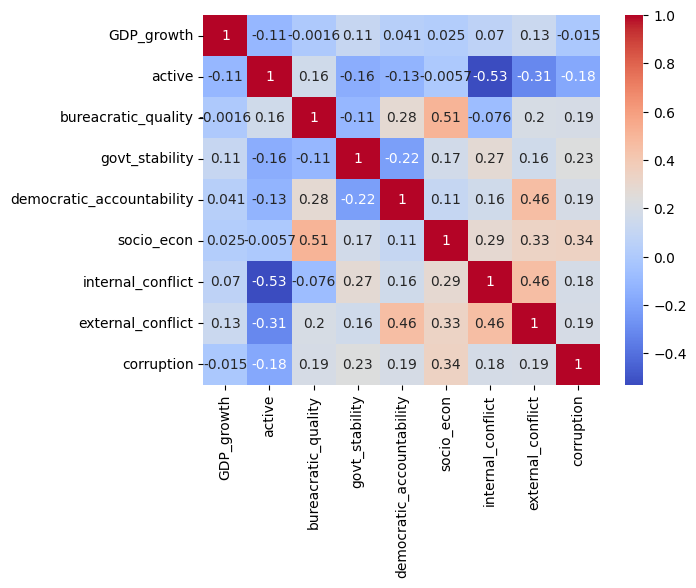

In [80]:
# Correlation matrix
corr_columns = ['GDP_growth', 'active', 'bureacratic_quality', 'govt_stability',
                'democratic_accountability', 'socio_econ', 'internal_conflict',
                'external_conflict', 'corruption']
corr_matrix = conflict_p1[corr_columns].corr()

# Correlation plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [55]:
pip install linearmodels

#HYPOTHESIS 1 - Active conflict and GDP growth

In [56]:
from linearmodels import PanelOLS

# Converting the DataFrame to a panel data structure
conflict_p = conflict_final.set_index(['country', 'year'])

# Filtering the DataFrame to remove rows with NA values in specified columns
conflict_p1 = conflict_p.dropna(subset=['GDPpercap', 'GDPpercap_growth', 'GDP_growth', 'GDP'])

# Panel regression models - Hypothesis 1: Active conflict and GDP growth
models = {
    'reg_plm': PanelOLS.from_formula('GDP_growth ~ active + EntityEffects + TimeEffects', data=conflict_p1),
    'reg_plm2': PanelOLS.from_formula('GDP_growth ~ active + bureacratic_quality + EntityEffects + TimeEffects', data=conflict_p1),
    'reg_plm3': PanelOLS.from_formula('GDP_growth ~ active + bureacratic_quality + govt_stability + EntityEffects + TimeEffects', data=conflict_p1),
    'reg_plm4': PanelOLS.from_formula('GDP_growth ~ active + bureacratic_quality + govt_stability + democratic_accountability + EntityEffects + TimeEffects', data=conflict_p1),
    'reg_plm5': PanelOLS.from_formula('GDP_growth ~ active + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + EntityEffects + TimeEffects', data=conflict_p1),
    'reg_plm6': PanelOLS.from_formula('GDP_growth ~ active + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + corruption + EntityEffects + TimeEffects', data=conflict_p1)
}

# Fitting the models and print the summaries
for name, model in models.items():
    results = model.fit()
    print(f'Results for {name}')
    print(results)

#

Results for reg_plm
                          PanelOLS Estimation Summary                           
Dep. Variable:             GDP_growth   R-squared:                        0.0371
Estimator:                   PanelOLS   R-squared (Between):             -1.0857
No. Observations:                 567   R-squared (Within):               0.0425
Date:                Sat, Jan 20 2024   R-squared (Overall):             -0.2492
Time:                        13:56:31   Log-likelihood                   -1975.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.955
Entities:                          28   P-value                           0.0000
Avg Obs:                       20.250   Distribution:                   F(1,518)
Min Obs:                       5.0000                                           
Max Obs:                       21.000   F-statistic (robust):             19.955
        

In [57]:
conflict_p1.reset_index(inplace=True)

#Additional models with different dependent variables.

models = {
    'active_reg3': 'GDPpercap ~ active + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + corruption',
    'active_reg4': 'GDPpercap_growth ~ active + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + internal_conflict + external_conflict + corruption',
    'active_reg': 'GDPpercap ~ active + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + internal_conflict + external_conflict + corruption + C(country)',
    'active_reg2': 'GDPpercap_growth ~ active + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + internal_conflict + external_conflict + corruption + C(country)'
}

# Fitting the models and display the summaries without 'country' coefficients
for name, formula in models.items():
    model = smf.ols(formula, data=conflict_p1)
    results = model.fit()

    # Extracting the summary as a DataFrame and filter out 'country' coefficients
    results_df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0]
    filtered_results = results_df[~results_df.index.str.contains('C\(country\)', regex=True)]

    print(f'Results for {name}')
    print(filtered_results)

Results for active_reg3
                               coef  std err      t  P>|t|   [0.025    0.975]
Intercept                  946.6133  449.961  2.104  0.036   62.796  1830.430
active                     425.2606  141.433  3.007  0.003  147.456   703.065
bureacratic_quality        426.2167  103.776  4.107  0.000  222.379   630.054
govt_stability             -66.5863   45.126 -1.476  0.141 -155.224    22.051
democratic_accountability   27.3664   53.958  0.507  0.612  -78.619   133.352
socio_econ                 191.8926   57.452  3.340  0.001   79.044   304.741
corruption                  62.4152  110.144  0.567  0.571 -153.931   278.761
Results for active_reg4
                             coef  std err      t  P>|t|  [0.025  0.975]
Intercept                 -2.8214    3.118 -0.905  0.366  -8.946   3.303
active                    -1.4257    0.851 -1.675  0.094  -3.097   0.246
bureacratic_quality        0.3070    0.552  0.556  0.579  -0.778   1.392
govt_stability             0.4478   

In [58]:
# Check if 'country' column exists in the DataFrame
print('country' in conflict_p1.columns)


True


#HYPOTHESIS 2 - Peace type and economic growth

In [59]:
# Since conflict_p1 is already defined and prepared
# Filter for peace types 2 and 3
conflict_p2 = conflict_p1[conflict_p1['peace_by'].isin([2, 3])].copy()

# Replace peace_by values: 2 becomes 0, 3 becomes 1 using .loc[]
conflict_p2.loc[:, 'peace_by'] = conflict_p2['peace_by'].replace({2: 0, 3: 1})

# Calculating mean GDP per capita growth for each peace_by category
mean_growth_peace_0 = conflict_p2[conflict_p2['peace_by'] == 0]['GDPpercap_growth'].mean()
mean_growth_peace_1 = conflict_p2[conflict_p2['peace_by'] == 1]['GDPpercap_growth'].mean()

# Counting the number of unique countries in conflict_p2
unique_countries_count = conflict_p2['country'].nunique()

print("Mean GDP per capita growth for peace_by 0:", mean_growth_peace_0)
print("Mean GDP per capita growth for peace_by 1:", mean_growth_peace_1)
print("Number of unique countries:", unique_countries_count)

Mean GDP per capita growth for peace_by 0: 2.3339841230526317
Mean GDP per capita growth for peace_by 1: 3.3230103688715604
Number of unique countries: 18


#Some panel regressions to explore the data, not presented in the paper

In [60]:

# Defining the models
models = {
    'active_reg3': 'np.log(GDPpercap) ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + internal_conflict + external_conflict + corruption',
    'active_reg4': 'GDPpercap_growth ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + internal_conflict + external_conflict + corruption',
    'active_reg': 'np.log(GDPpercap) ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + internal_conflict + external_conflict + corruption + C(country)',
    'active_reg2': 'GDPpercap_growth ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + internal_conflict + external_conflict + corruption + C(country)'
}

# Fitting the models and display the summaries without 'country' coefficients
for name, formula in models.items():
    model = smf.ols(formula, data=conflict_p2)
    results = model.fit()

    # Extract the summary as a DataFrame and filter out 'country' coefficients
    results_df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0]
    filtered_results = results_df[~results_df.index.str.contains('C\(country\)', regex=True)]

    print(f'Results for {name}')
    print(filtered_results)

Results for active_reg3
                             coef  std err      t  P>|t|  [0.025  0.975]
Intercept                  5.3956    0.624  8.640  0.000   4.163   6.628
peace_by                   0.0737    0.136  0.541  0.589  -0.195   0.343
bureacratic_quality        0.0130    0.094  0.138  0.890  -0.173   0.199
govt_stability            -0.0682    0.045 -1.523  0.130  -0.157   0.020
democratic_accountability -0.1414    0.053 -2.647  0.009  -0.247  -0.036
socio_econ                 0.1197    0.059  2.038  0.043   0.004   0.236
internal_conflict         -0.1038    0.058 -1.803  0.073  -0.217   0.010
external_conflict          0.3084    0.061  5.043  0.000   0.188   0.429
corruption                 0.1492    0.098  1.525  0.129  -0.044   0.342
Results for active_reg4
                             coef  std err      t  P>|t|  [0.025  0.975]
Intercept                 -1.2459    8.663 -0.144  0.886 -18.344  15.852
peace_by                   0.9391    1.890  0.497  0.620  -2.790   4.668
bur

In [61]:
# Defining and fitting the regression models
models = {
    'peace_reg1': 'np.log(GDPpercap) ~ peace_by + C(country)',
    'peace_reg2': 'np.log(GDPpercap) ~ peace_by + bureacratic_quality + C(country)',
    'peace_reg3': 'np.log(GDPpercap) ~ peace_by + bureacratic_quality + govt_stability + C(country)',
    'peace_reg4': 'np.log(GDPpercap) ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + C(country)',
    'peace_reg5': 'np.log(GDPpercap) ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + C(country)',
    'peace_reg6': 'np.log(GDPpercap) ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + corruption + C(country)'
}

# Fitting the models and display the summaries
for name, formula in models.items():
    model = smf.ols(formula, data=conflict_p2)
    results = model.fit()
    print(f'Results for {name}')
    print(results.summary())

Results for peace_reg1
                            OLS Regression Results                            
Dep. Variable:      np.log(GDPpercap)   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          9.72e-123
Time:                        13:56:45   Log-Likelihood:                 124.47
No. Observations:                 185   AIC:                            -210.9
Df Residuals:                     166   BIC:                            -149.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [62]:
# Checking the current index of the DataFrame
print(conflict_p2.index.names)

# If 'country' and 'year' are not set as index, set them as a MultiIndex
if set(conflict_p2.index.names) != {'country', 'year'}:
    conflict_p2 = conflict_p2.set_index(['country', 'year'])




[None]


In [63]:
print("Is 'growth_lead2' in DataFrame:", 'growth_lead2' in conflict_p2.columns)


Is 'growth_lead2' in DataFrame: True


#FINAL PANEL REGRESSIONS - PRESENTED IN THE PAPER

In [64]:
# Defining panel regression models
models = {
    'reg_plmA': PanelOLS.from_formula('growth_lead2 ~ peace_by + EntityEffects + TimeEffects', data=conflict_p2),
    'reg_plm2A': PanelOLS.from_formula('growth_lead2 ~ peace_by + bureacratic_quality + EntityEffects + TimeEffects', data=conflict_p2),
    'reg_plm3A': PanelOLS.from_formula('growth_lead2 ~ peace_by + bureacratic_quality + govt_stability + EntityEffects + TimeEffects', data=conflict_p2),
    'reg_plm4A': PanelOLS.from_formula('growth_lead2 ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + EntityEffects + TimeEffects', data=conflict_p2),
    'reg_plm5A': PanelOLS.from_formula('growth_lead2 ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + EntityEffects + TimeEffects', data=conflict_p2),
    'reg_plm6A': PanelOLS.from_formula('growth_lead2 ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + corruption + EntityEffects + TimeEffects', data=conflict_p2)
}

# Fitting the models and print their summaries
for name, model in models.items():
    results = model.fit()
    print(f'Results for {name}')
    print(results)

Results for reg_plmA
                          PanelOLS Estimation Summary                           
Dep. Variable:           growth_lead2   R-squared:                        0.0015
Estimator:                   PanelOLS   R-squared (Between):              0.0009
No. Observations:                 185   R-squared (Within):               0.0120
Date:                Sat, Jan 20 2024   R-squared (Overall):             -0.0610
Time:                        13:56:50   Log-likelihood                   -520.50
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.2151
Entities:                          18   P-value                           0.6435
Avg Obs:                       10.278   Distribution:                   F(1,147)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):             0.2151
       

#Robustness check - Final panel regressions for hypothesis2, FIRST FIVE YEARS

In [65]:
# Filter for the first five years
conflict_p3 = conflict_p2[conflict_p2['peace_fiveyrs'] == 1]

# Defining panel regression models for the robustness check
robustness_models = {
    'reg_plmB': PanelOLS.from_formula('growth_lead2 ~ peace_by + EntityEffects + TimeEffects', data=conflict_p3),
    'reg_plm2B': PanelOLS.from_formula('growth_lead2 ~ peace_by + bureacratic_quality + EntityEffects + TimeEffects', data=conflict_p3),
    'reg_plm3B': PanelOLS.from_formula('growth_lead2 ~ peace_by + bureacratic_quality + govt_stability + EntityEffects + TimeEffects', data=conflict_p3),
    'reg_plm4B': PanelOLS.from_formula('growth_lead2 ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + EntityEffects + TimeEffects', data=conflict_p3),
    'reg_plm5B': PanelOLS.from_formula('growth_lead2 ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + EntityEffects + TimeEffects', data=conflict_p3),
    'reg_plm6B': PanelOLS.from_formula('growth_lead2 ~ peace_by + bureacratic_quality + govt_stability + democratic_accountability + socio_econ + corruption + EntityEffects + TimeEffects', data=conflict_p3)
}

# Fitting the models and print their summaries
for name, model in robustness_models.items():
    results = model.fit()
    print(f'Results for {name}')
    print(results)

Results for reg_plmB
                          PanelOLS Estimation Summary                           
Dep. Variable:           growth_lead2   R-squared:                        0.0237
Estimator:                   PanelOLS   R-squared (Between):             -0.0582
No. Observations:                  99   R-squared (Within):               0.1124
Date:                Sat, Jan 20 2024   R-squared (Overall):             -0.3326
Time:                        13:56:53   Log-likelihood                   -235.43
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.4794
Entities:                          18   P-value                           0.2286
Avg Obs:                       5.5000   Distribution:                    F(1,61)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             1.4794
       


#REGRESSION DISCONTINUITY DESIGN CODE

In [66]:
pip install rdd


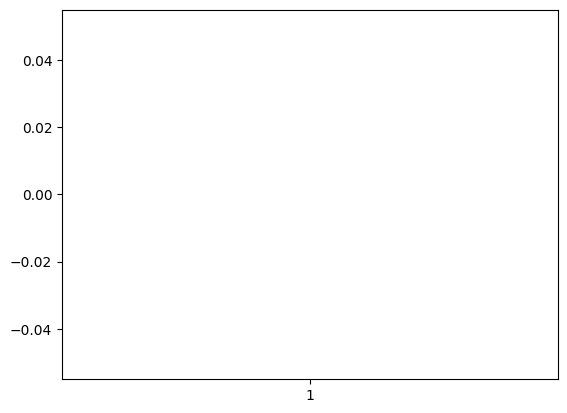

<ipython-input-67-3b8023c53bac>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coop_rd['peace_by'] = np.where(coop_rd['time_to_event2'] >= 0, 2, 1)


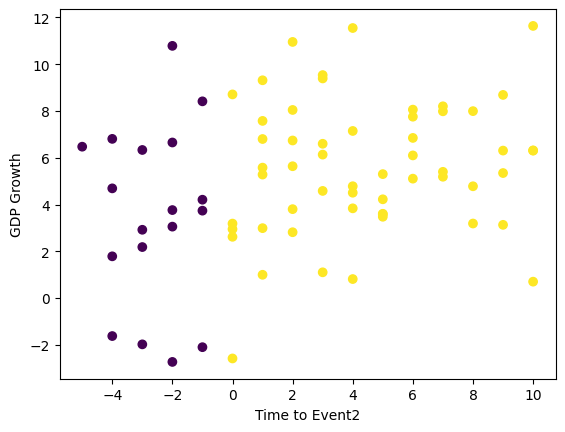

In [67]:
from rdd import rdd
# Filter out rows with NA in 'time_to_event2'
coop_rd = conflict_final[conflict_final['time_to_event2'].notna()]

# Boxplot for 'GDP_growth' and identify outliers
plt.boxplot(coop_rd['GDP_growth'])
plt.show()

# Outlier removal based on the boxplot
Q1 = coop_rd['GDP_growth'].quantile(0.25)
Q3 = coop_rd['GDP_growth'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
coop_rd = coop_rd[(coop_rd['GDP_growth'] >= lower_bound) & (coop_rd['GDP_growth'] <= upper_bound)]

# Creating 'peace_by' based on 'time_to_event2'
coop_rd['peace_by'] = np.where(coop_rd['time_to_event2'] >= 0, 2, 1)

# Scatter plot
plt.scatter(coop_rd['time_to_event2'], coop_rd['GDP_growth'], c=coop_rd['peace_by'])
plt.xlabel('Time to Event2')
plt.ylabel('GDP Growth')
plt.show()

In [68]:
# Define the cutoff for RDD
cutoff = 0

# Fit the RDD model
model = rdd.rdd(coop_rd, 'time_to_event2', 'GDP_growth', cut=cutoff)
rdd_result = model.fit()

# Print the summary
print(rdd_result.summary())

Estimation Equation:	 GDP_growth ~ TREATED + time_to_event2
                            WLS Regression Results                            
Dep. Variable:             GDP_growth   R-squared:                       0.092
Model:                            WLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3.531
Date:                Sat, 20 Jan 2024   Prob (F-statistic):             0.0346
Time:                        13:57:08   Log-Likelihood:                -184.92
No. Observations:                  73   AIC:                             375.8
Df Residuals:                      70   BIC:                             382.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------


#RDD Visualization

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols



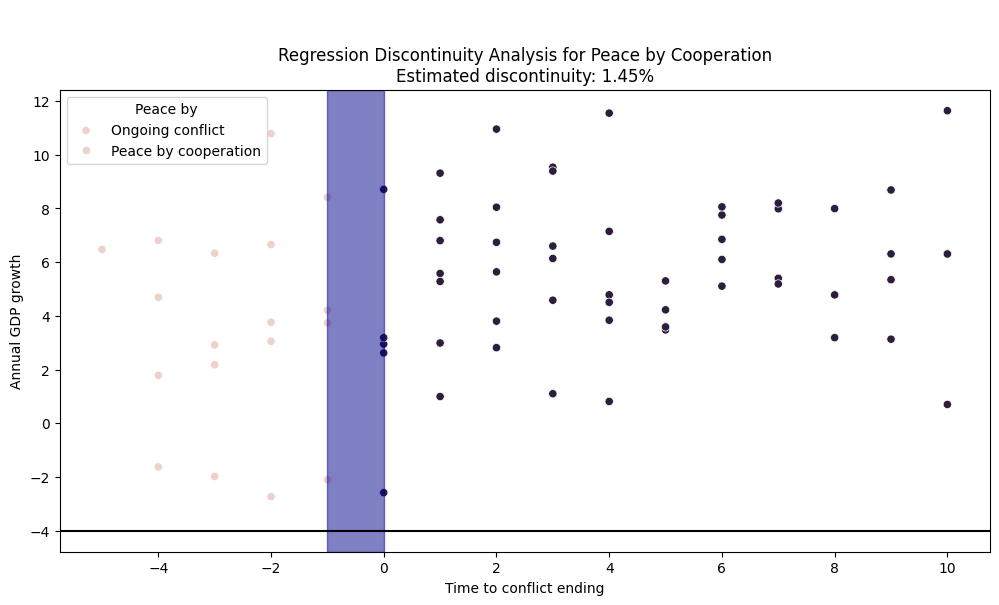

In [70]:
# Filter out rows with NA in 'time_to_event2'
coop_rd = conflict_final[conflict_final['time_to_event2'].notna()]

# Outlier removal based on the boxplot
Q1 = coop_rd['GDP_growth'].quantile(0.25)
Q3 = coop_rd['GDP_growth'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
coop_rd = coop_rd[(coop_rd['GDP_growth'] >= lower_bound) & (coop_rd['GDP_growth'] <= upper_bound)]

# Create 'peace_by' based on 'time_to_event2'
coop_rd['peace_by'] = np.where(coop_rd['time_to_event2'] >= 0, 2, 1)

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=coop_rd, x='time_to_event2', y='GDP_growth', hue='peace_by')
plt.axvspan(-1, 0, color='darkblue', alpha=0.5)
plt.text(-3, 15, "Ongoing conflict", color='white')
plt.text(3, 15, "Peace by cooperation", color='white')
plt.axhline(y=-4, color='black', linestyle='-')
plt.title("Regression Discontinuity Analysis for Peace by Cooperation\nEstimated discontinuity: 1.45%")
plt.xlabel("Time to conflict ending")
plt.ylabel("Annual GDP growth")
plt.legend(title='Peace by', labels=['Ongoing conflict', 'Peace by cooperation'])
plt.show()


<Figure size 1200x600 with 0 Axes>

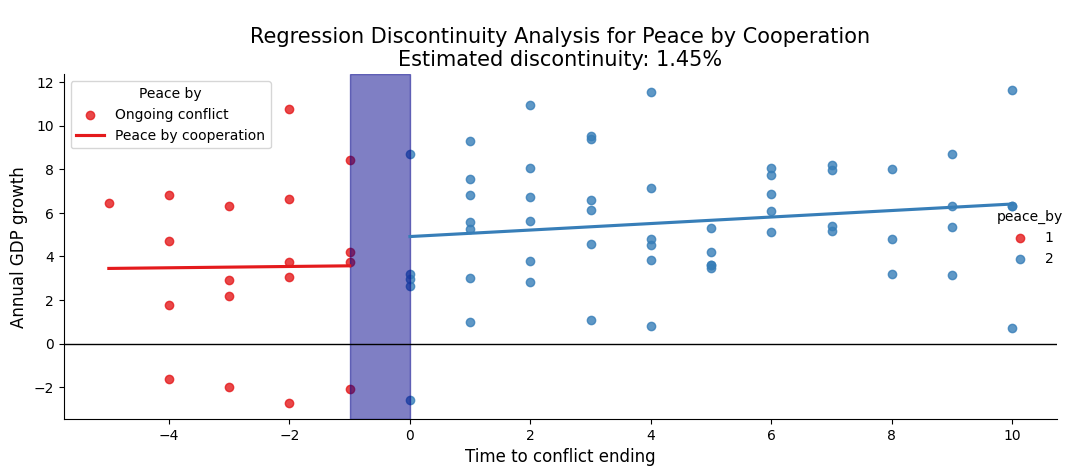

In [71]:
# Create a scatter plot with a regression line before and after the cutoff
plt.figure(figsize=(12, 6))
sns.lmplot(data=coop_rd, x='time_to_event2', y='GDP_growth', hue='peace_by', palette='Set1', lowess=False, aspect=2, ci=None)

# Highlight the area of interest with a vertical span
plt.axvspan(-1, 0, color='darkblue', alpha=0.5)

# Add text annotations
plt.text(-3, 15, "Ongoing conflict", color='white', ha='center', va='center')
plt.text(3, 15, "Peace by cooperation", color='white', ha='center', va='center')

# Add horizontal line
plt.axhline(y=0, color='black', linewidth=1)

# Set title and labels
plt.title("Regression Discontinuity Analysis for Peace by Cooperation\nEstimated discontinuity: 1.45%", fontsize=15)
plt.xlabel("Time to conflict ending", fontsize=12)
plt.ylabel("Annual GDP growth", fontsize=12)

# Set legend
plt.legend(title='Peace by', labels=['Ongoing conflict', 'Peace by cooperation'])

# Tight layout for the figure
plt.tight_layout()

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:             GDP_growth   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.2059
Date:                Sat, 20 Jan 2024   Prob (F-statistic):              0.814
Time:                        13:57:10   Log-Likelihood:                -298.93
No. Observations:                 124   AIC:                             603.9
Df Residuals:                     121   BIC:                             612.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.6857      1.277      3.

<ipython-input-72-520df9ecbf4d>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=victory_rd, x='time_to_event3', y='GDP_growth', hue='peace_by', ci=None)


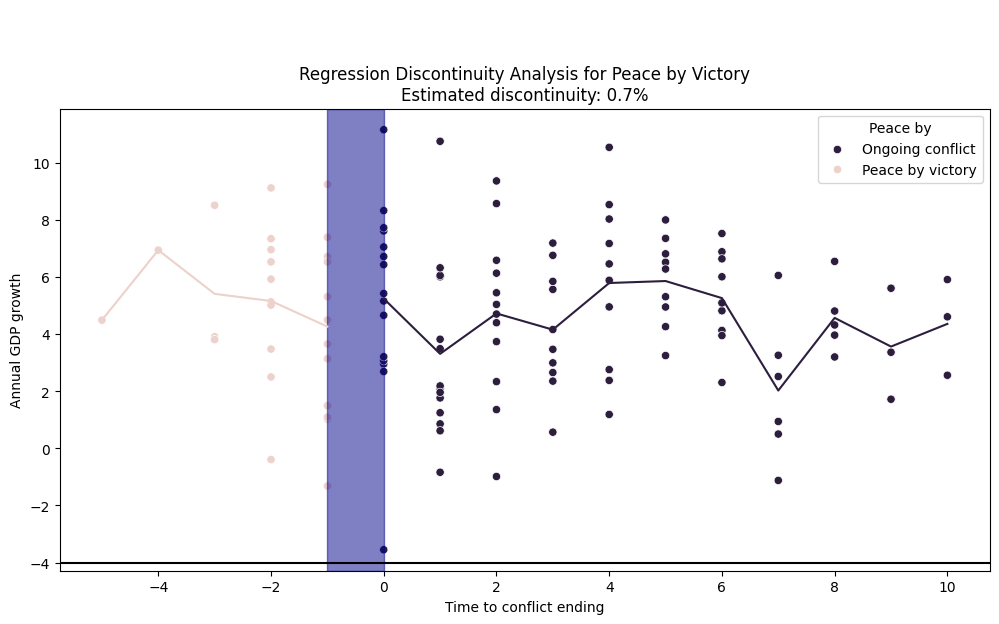

In [72]:
# Filter out rows with NA in 'time_to_event3'
victory_rd = conflict_final[conflict_final['time_to_event3'].notna()]

# Boxplot for 'GDP_growth' to identify outliers
Q1_victory = victory_rd['GDP_growth'].quantile(0.25)
Q3_victory = victory_rd['GDP_growth'].quantile(0.75)
IQR_victory = Q3_victory - Q1_victory
lower_bound_victory = Q1_victory - 1.5 * IQR_victory
upper_bound_victory = Q3_victory + 1.5 * IQR_victory
victory_rd = victory_rd[(victory_rd['GDP_growth'] >= lower_bound_victory) & (victory_rd['GDP_growth'] <= upper_bound_victory)]

# Creating 'peace_by' based on 'time_to_event3'
victory_rd['peace_by'] = np.where(victory_rd['time_to_event3'] >= 0, 2, 1)


# Regression analysis for 'victory_rd'
formula = 'GDP_growth ~ time_to_event3 + peace_by'
model = ols(formula, data=victory_rd).fit()

# Print the summary of the regression
print(model.summary())

# Visualization for 'victory_rd'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=victory_rd, x='time_to_event3', y='GDP_growth', hue='peace_by')
sns.lineplot(data=victory_rd, x='time_to_event3', y='GDP_growth', hue='peace_by', ci=None)
plt.axvspan(-1, 0, color='darkblue', alpha=0.5)
plt.text(-3, 15, "Ongoing conflict", color='white')
plt.text(3, 15, "Peace by victory", color='white')
plt.axhline(y=-4, color='black', linestyle='-')
plt.title("Regression Discontinuity Analysis for Peace by Victory\nEstimated discontinuity: 0.7%")
plt.xlabel("Time to conflict ending")
plt.ylabel("Annual GDP growth")
plt.legend(title='Peace by', labels=['Ongoing conflict', 'Peace by victory'])
plt.show()

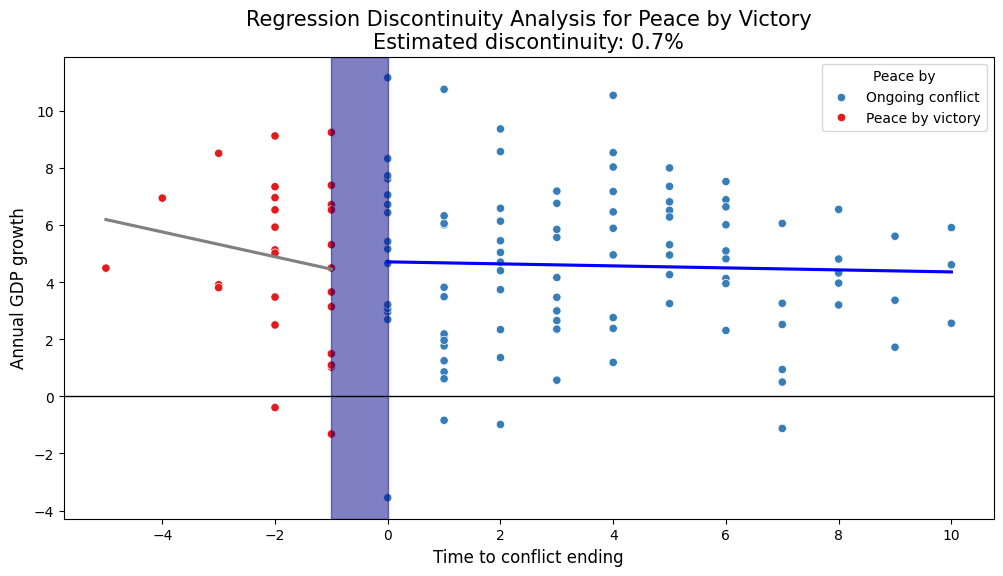

In [73]:
# Creating a scatter plot with a regression line before and after the cutoff
plt.figure(figsize=(12, 6))
# Scatter plot with victory_rd data
sns.scatterplot(data=victory_rd, x='time_to_event3', y='GDP_growth', hue='peace_by', palette='Set1')

# Fitting separate regression lines for before and after the cutoff
pre_cutoff = victory_rd[victory_rd['time_to_event3'] < 0]
post_cutoff = victory_rd[victory_rd['time_to_event3'] >= 0]

sns.regplot(data=pre_cutoff, x='time_to_event3', y='GDP_growth', scatter=False, color='grey', ci=None)
sns.regplot(data=post_cutoff, x='time_to_event3', y='GDP_growth', scatter=False, color='blue', ci=None)

# Highlighting the area of interest with a vertical span
plt.axvspan(-1, 0, color='darkblue', alpha=0.5)

# Adding text annotations for the shaded area
plt.text(-3, max(victory_rd['GDP_growth']), "Ongoing conflict", color='white', ha='center', va='center')
plt.text(3, max(victory_rd['GDP_growth']), "Peace by victory", color='white', ha='center', va='center')

# Adding horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Setting title and labels
plt.title("Regression Discontinuity Analysis for Peace by Victory\nEstimated discontinuity: 0.7%", fontsize=15)
plt.xlabel("Time to conflict ending", fontsize=12)
plt.ylabel("Annual GDP growth", fontsize=12)

# Removing the legend if not needed
plt.legend(title='Peace by', labels=['Ongoing conflict', 'Peace by victory'])

plt.show()

# K-Means Clustering Analysis

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
conflict_data = conflict_final

# Select features for clustering
features = ['intensity', 'active', 'peace_by', 'growth_lead2']
data_for_clustering = conflict_data[features]

# Handle missing values and normalize the data
data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)


<ipython-input-74-8a25bddeae17>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

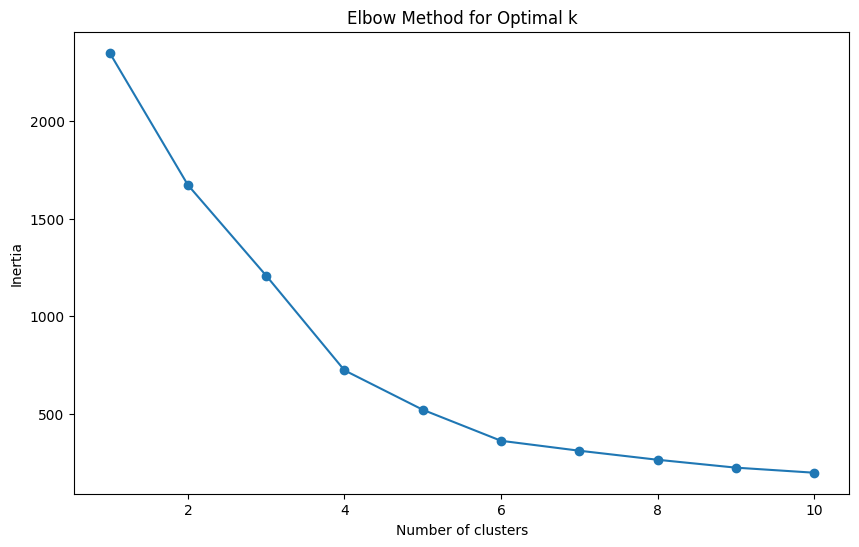

In [75]:
# Elbow Method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [85]:
# Apply K-Means with an assumed optimal number of clusters
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(scaled_data)
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(scaled_data)

# Assigning cluster labels to each observation
clusters_3 = kmeans_3.labels_
clusters_4 = kmeans_4.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [86]:
# Function to calculate the mean values for each cluster
def calculate_cluster_means(data, clusters):
    means = []
    for k in np.unique(clusters):
        mean_values = data[clusters == k].mean(axis=0)
        means.append(mean_values)
    return means

# Calculating means for 3-cluster and 4-cluster models
means_3_clusters = calculate_cluster_means(scaled_data, clusters_3)
means_4_clusters = calculate_cluster_means(scaled_data, clusters_4)


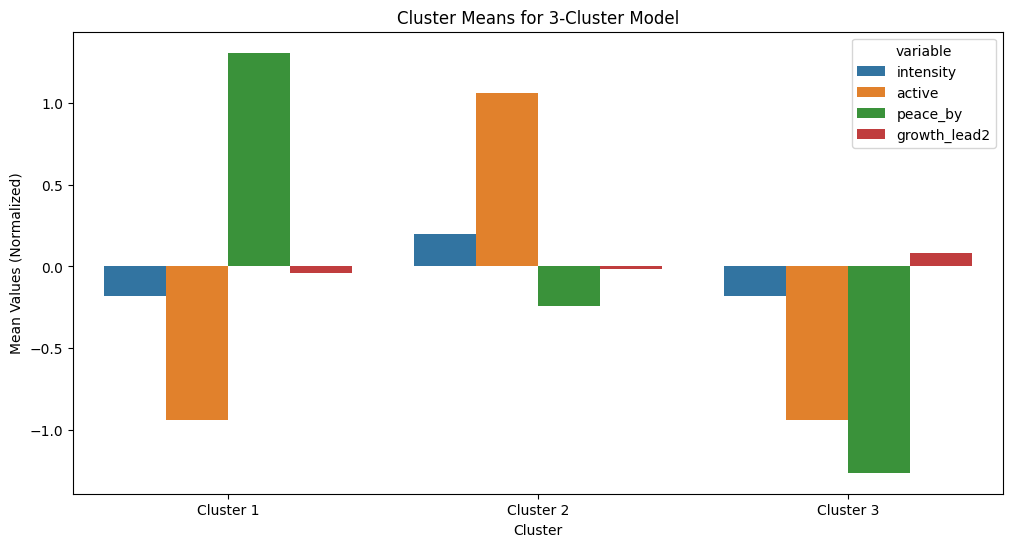

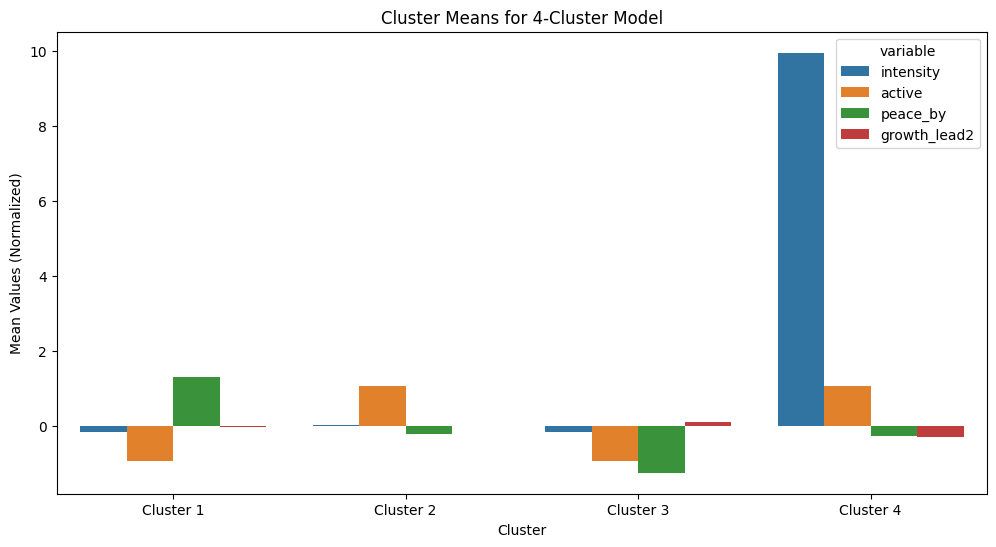

## RANDOM FOREST

In [94]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [104]:
# Defining the features and target variable
features = ['democratic_accountability', 'bureacratic_quality', 'govt_stability',
            'intensity', 'peace_by', 'active']
target = 'growth_lead2'
data = data.dropna(subset=[target])

In [105]:
# Splitting the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
#Initializing the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

#Hyperparameter Tuning with GridSearchCV

In [107]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

Evaluating the Model

In [108]:
# Retrieving the best model
best_rf = grid_search.best_estimator_

# Prediction and evaluation
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print('Best Parameters:', grid_search.best_params_)
print('Mean Squared Error:', mse)
print('R² Score:', r2)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 69.42900592533246
R² Score: 0.010303276055962263


Further Hyperparameter Tuning

In [109]:
extended_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [20, 30, 40],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [1, 2, 3]
}

extended_grid_search = GridSearchCV(estimator=rf, param_grid=extended_param_grid,
                                    cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
extended_grid_search.fit(X_train, y_train)

# Evaluating the extended model
extended_best_rf = extended_grid_search.best_estimator_
extended_y_pred = extended_best_rf.predict(X_test)
extended_mse = mean_squared_error(y_test, extended_y_pred)
extended_r2 = r2_score(y_test, extended_y_pred)

print('Extended Best Parameters:', extended_grid_search.best_params_)
print('Extended Mean Squared Error:', extended_mse)
print('Extended R² Score:', extended_r2)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Extended Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 100}
Extended Mean Squared Error: 69.11933418542583
Extended R² Score: 0.014717585355064844


##Gradient Boosting


In [110]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=42)


In [111]:
gb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}


In [112]:
from sklearn.model_selection import GridSearchCV
gb_grid_search = GridSearchCV(estimator=gb_regressor, param_grid=gb_param_grid,
                              cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [113]:
best_gb = gb_grid_search.best_estimator_
y_pred_gb = best_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)


In [114]:
print('Best Parameters:', gb_grid_search.best_params_)
print('Gradient Boosting MSE:', mse_gb)
print('Gradient Boosting R² Score:', r2_gb)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting MSE: 66.86183560297154
Gradient Boosting R² Score: 0.04689778038430281


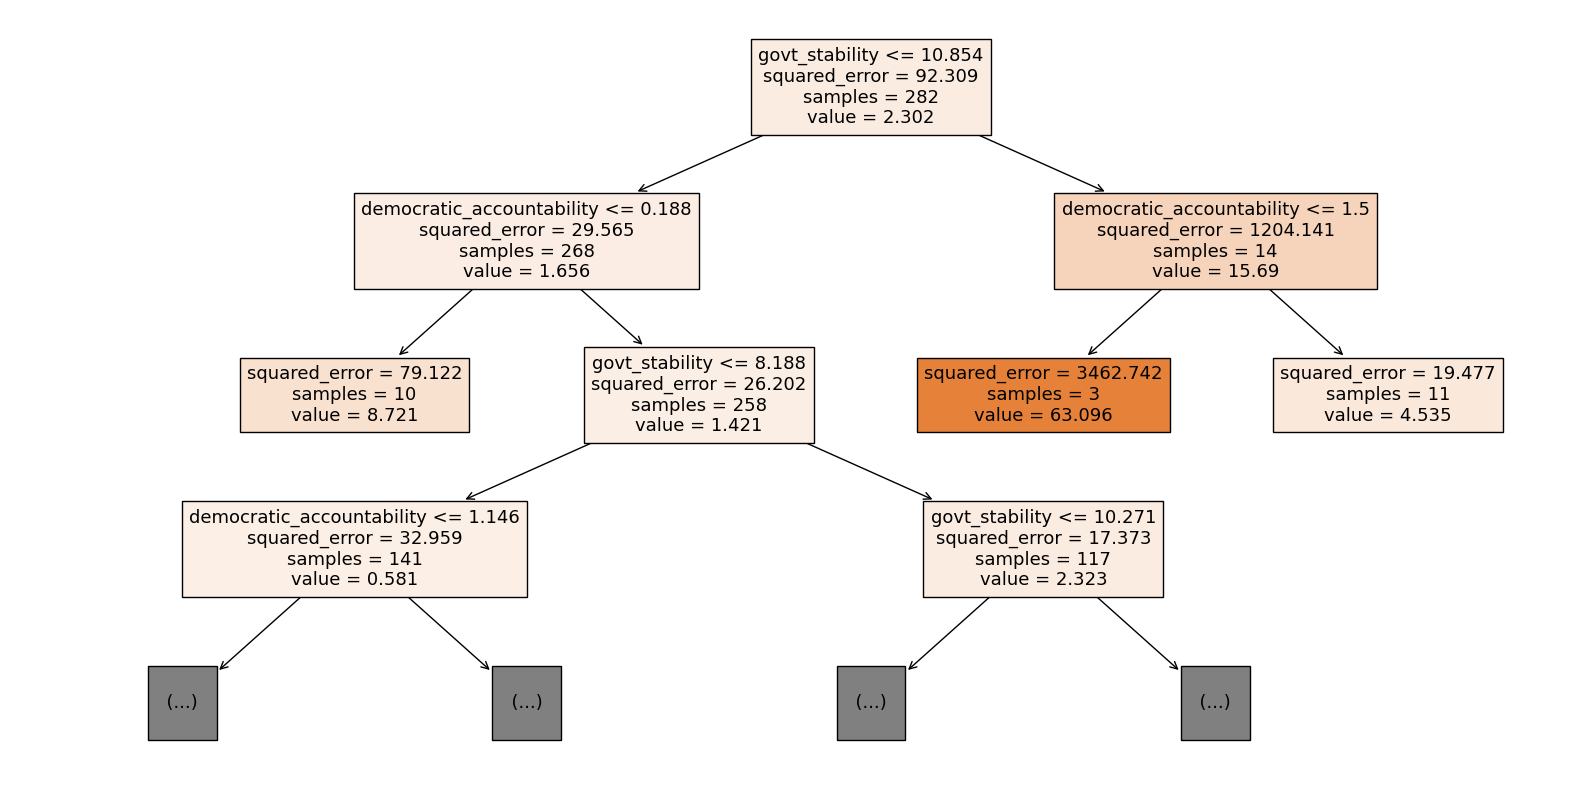

In [116]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
chosen_tree = extended_best_rf.estimators_[0]
plot_tree(chosen_tree, filled=True, feature_names=features, max_depth=3)
plt.show()


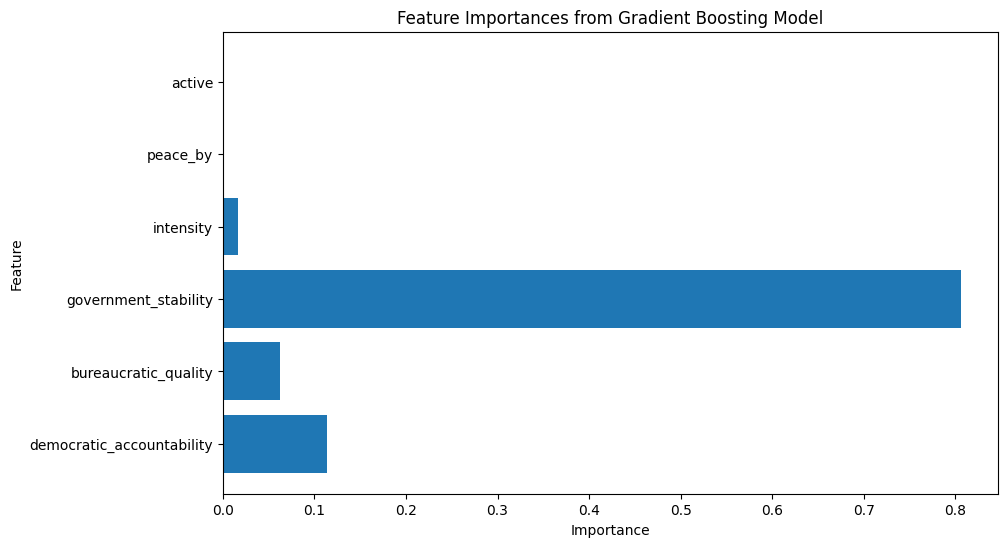

In [118]:
import matplotlib.pyplot as plt

# Assuming 'gb_grid_search' is your trained Gradient Boosting model
feature_importances = gb_grid_search.best_estimator_.feature_importances_

# Replacing 'feature_columns' with the list of feature names used in your model
feature_names = ['democratic_accountability', 'bureaucratic_quality', 'government_stability', 'intensity', 'peace_by', 'active']

# Creating a bar chart for feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient Boosting Model')
plt.show()
